<a href="https://colab.research.google.com/github/Navyasaipusala/final_exam/blob/main/final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9884 - loss: 0.0334
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9896 - loss: 0.0298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9903 - loss: 0.0288
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9913 - loss: 0.0256
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9908 - loss: 0.0273
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9764 - loss: 0.1059
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(7)

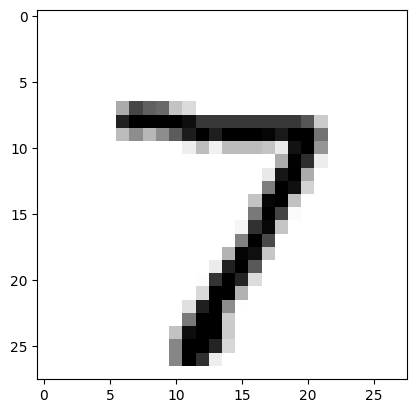

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
predictions = probability_model.predict(x_test)
plt.imshow(x_test[0])
plt.imshow(x_test[0], cmap=plt.cm.binary)
np.argmax(predictions[0])


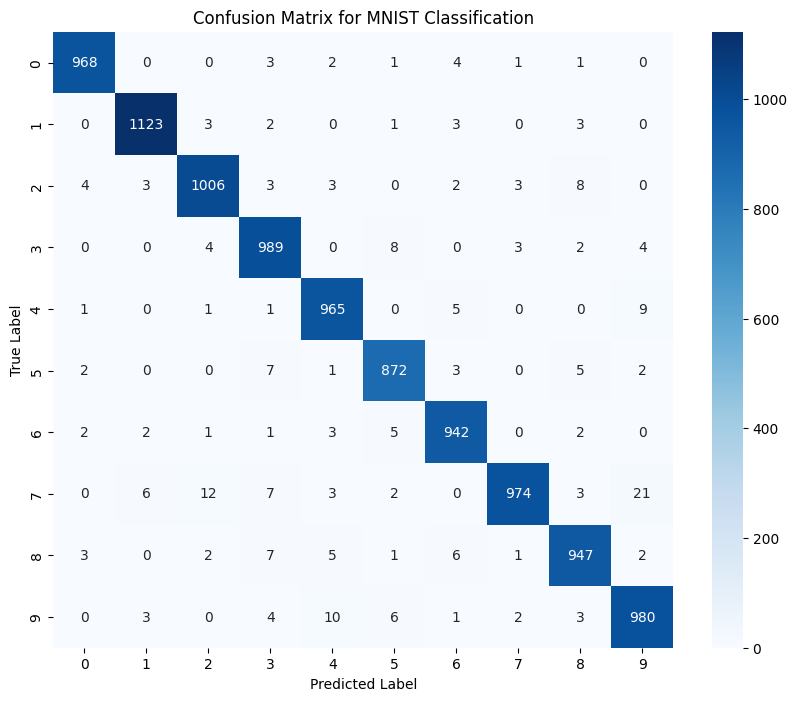

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

predicted_labels = np.argmax(predictions, axis=1)


cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9804 - loss: 0.0622 - val_accuracy: 0.9785 - val_loss: 0.0724
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9806 - loss: 0.0593 - val_accuracy: 0.9786 - val_loss: 0.0683
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9826 - loss: 0.0530 - val_accuracy: 0.9804 - val_loss: 0.0690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9846 - loss: 0.0472 - val_accuracy: 0.9763 - val_loss: 0.0751
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9848 - loss: 0.0476 - val_accuracy: 0.9799 - val_loss: 0.0744


Text(0, 0.5, 'Accuracy')

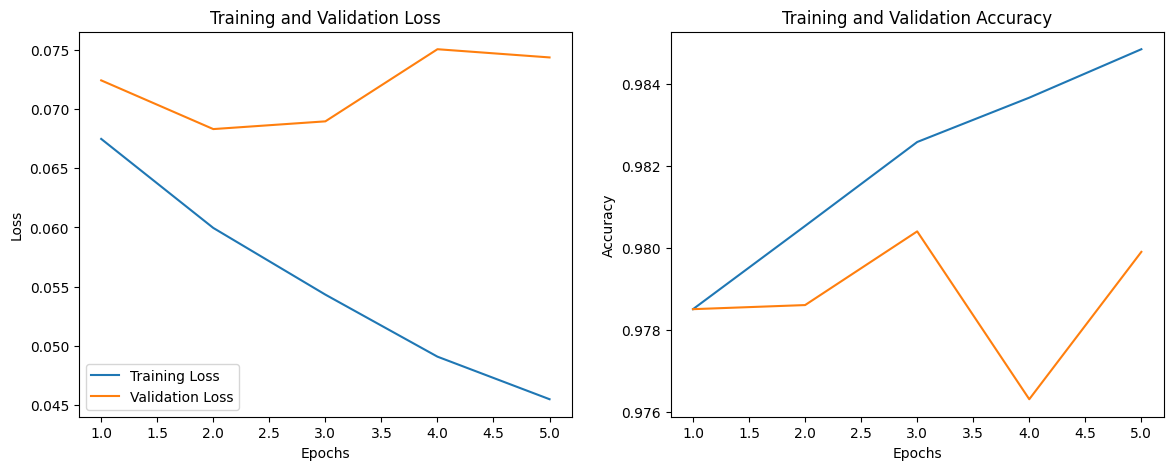

In [ ]:
# Train the model and store the history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Extract data from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
ax1.plot(epochs_range, loss, label='Training Loss')
ax1.plot(epochs_range, val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot Accuracy
ax2.plot(epochs_range, acc, label='Training Accuracy')
ax2.plot(epochs_range, val_acc, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')


In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9912 - loss: 0.0246 - val_accuracy: 0.9812 - val_loss: 0.0767
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9906 - loss: 0.0274 - val_accuracy: 0.9795 - val_loss: 0.0836
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9912 - loss: 0.0256 - val_accuracy: 0.9795 - val_loss: 0.0850
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9916 - loss: 0.0246 - val_accuracy: 0.9807 - val_loss: 0.0878
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9928 - loss: 0.0203 - val_accuracy: 0.9807 - val_loss: 0.0868


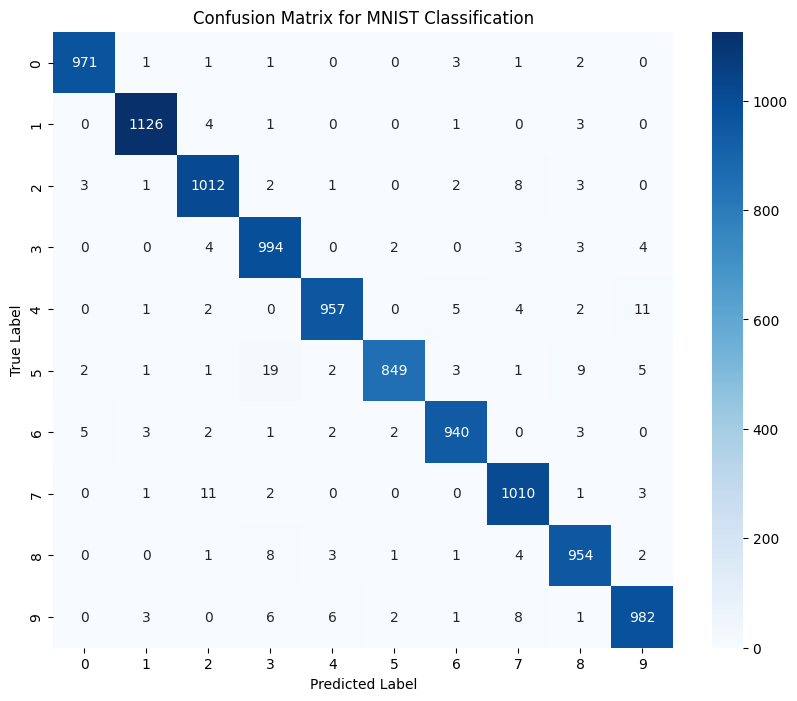

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predicted labels from model
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Step 3: Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()


In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9914 - loss: 0.0250 - val_accuracy: 0.9800 - val_loss: 0.0844
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9921 - loss: 0.0225 - val_accuracy: 0.9802 - val_loss: 0.0896
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9930 - loss: 0.0196 - val_accuracy: 0.9805 - val_loss: 0.0912
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9928 - loss: 0.0210 - val_accuracy: 0.9793 - val_loss: 0.0959
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9928 - loss: 0.0210 - val_accuracy: 0.9803 - val_loss: 0.0905


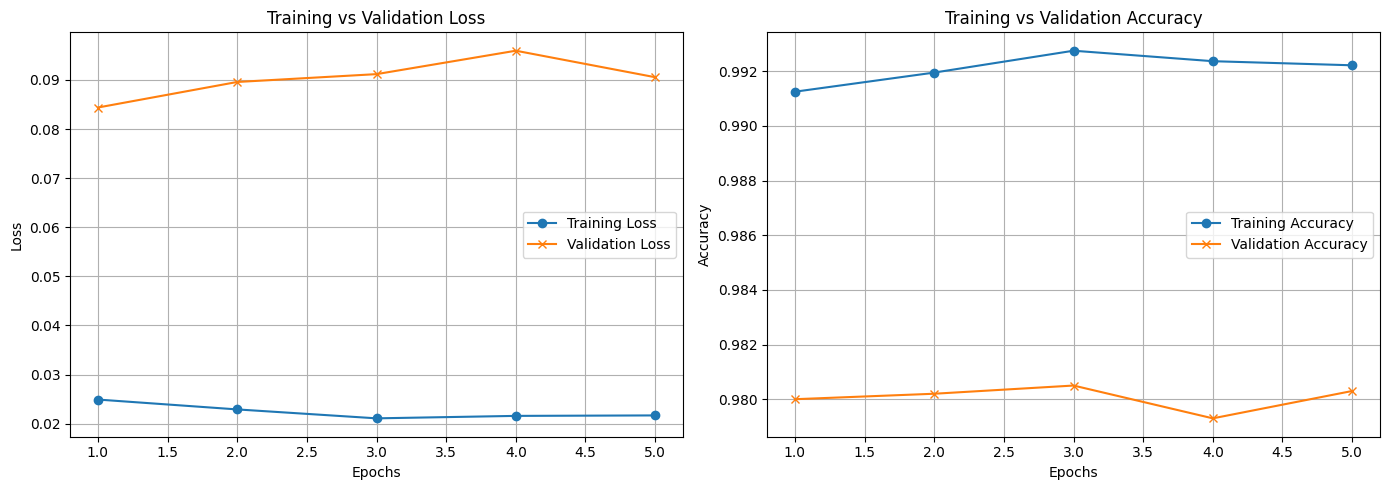

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
ax1.plot(epochs, loss, label='Training Loss', marker='o')
ax1.plot(epochs, val_loss, label='Validation Loss', marker='x')
ax1.set_title('Training vs Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot Accuracy
ax2.plot(epochs, acc, label='Training Accuracy', marker='o')
ax2.plot(epochs, val_acc, label='Validation Accuracy', marker='x')
ax2.set_title('Training vs Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
